영상 데이터 셋
- ImageNet
- MSCoCo
- CIFAR : MINIST 다음으로 주로 사용
- CIFAR-10 : 10개의 클래스 컬러 영상 32,32

In [1]:
target_name = [
    'airplane',
    'automobile',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck'
]
target_name

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout

(X_train, y_train),(X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 15s 0us/step


In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
import matplotlib.pyplot as plt
index = [np.where(y_test == i)[0][0] for i in range(10)]
index

[3, 6, 25, 0, 22, 12, 4, 13, 1, 11]

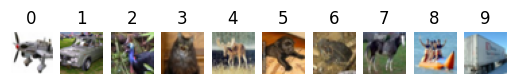

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [5]:
index = [np.where(y_train[:,0]==i)[0][3] for i in range(10)]
# plt.figure(figsize=(5,5))
for i,img_index in enumerate(index):
  plt.subplot(1,10,i+1)
  plt.imshow(X_train[img_index])
  plt.title(i)
  plt.axis('off')
plt.show()
print(target_name)

In [6]:
np.where(y_test[:,0]==2)[0][0]

25

In [7]:
X_train.shape[1:]

(32, 32, 3)

In [8]:
# 표준화
# c c p d c c p d fc d fc
X_train_scaled = X_train / 255.0; X_test_scaled = X_test / 255.0
# 신경망 설계
model = Sequential([
 Conv2D(64,3, activation='relu', input_shape = X_train.shape[1:], padding='same' ),
 Conv2D(128,3, activation='relu', padding='same' ),
 MaxPool2D(2),
 Dropout(0.25),

 Conv2D(256,3, activation='relu', padding='same' ),
 Conv2D(512,3, activation='relu', padding='same' ),
 MaxPool2D(2),
 Dropout(0.25),

 Flatten(),

 Dense(512,activation='relu'),
 Dropout(0.5),
 Dense(10,activation='softmax')
])
# 학습
# 컴파일
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics='accuracy')
# callback
ealy_stopping = tf.keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('best_model.keras', save_best_only=True)
# fit
hist = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2,callbacks = [checkpoint_cb, ealy_stopping])
# 평가
best_model = tf.keras.models.load_model('best_model.keras')
best_model.evaluate(X_test_scaled, y_test)
# 모델 최종 완성

Epoch 1/100
1250/1250 [==============================] - 36s 23ms/step - loss: 1.5819 - accuracy: 0.4254 - val_loss: 1.1595 - val_accuracy: 0.5788
Epoch 2/100
1250/1250 [==============================] - 30s 24ms/step - loss: 1.1149 - accuracy: 0.6039 - val_loss: 0.9123 - val_accuracy: 0.6834
Epoch 3/100
1250/1250 [==============================] - 28s 22ms/step - loss: 0.9469 - accuracy: 0.6687 - val_loss: 0.8351 - val_accuracy: 0.7055
Epoch 4/100
1250/1250 [==============================] - 29s 23ms/step - loss: 0.8231 - accuracy: 0.7106 - val_loss: 0.7466 - val_accuracy: 0.7442
Epoch 5/100
1250/1250 [==============================] - 29s 23ms/step - loss: 0.7354 - accuracy: 0.7447 - val_loss: 0.6996 - val_accuracy: 0.7581
Epoch 6/100
1250/1250 [==============================] - 28s 22ms/step - loss: 0.6761 - accuracy: 0.7617 - val_loss: 0.7234 - val_accuracy: 0.7571
Epoch 7/100
313/313 [==============================] - 2s 6ms/step - loss: 0.7119 - accuracy: 0.7540


[0.7119479179382324, 0.7540000081062317]

In [9]:
# 종류에 맞는이미지 데이터를 수집해서
# 클래스별로 분류 - 자동 분류기

이미지 증폭기

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
x_sample = X_train_scaled[:10]; y_sample = y_train[:10]

In [12]:
generator = ImageDataGenerator(
    rotation_range=30.0,  width_shift_range = 0.2, height_shift_range=0.2,
    horizontal_flip=True
)
batch_size = 10
gen = generator.flow(x_sample,y_sample,batch_size = batch_size)

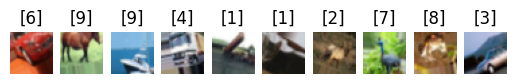

In [13]:
# 한번 증대
img,label =  gen.next()
for i in range(batch_size):
  plt.subplot(1, batch_size, i+1)
  plt.imshow(img[i])
  plt.axis('off')
  plt.title(y_sample[i])
plt.show()

CIFAR-10 + 이미지 제너레이터

In [14]:
# 표준화
# c c p d c c p d fc d fc
X_train_scaled = X_train / 255.0; X_test_scaled = X_test / 255.0
# 신경망 설계
model = Sequential([
 Conv2D(64,3, activation='relu', input_shape = X_train.shape[1:], padding='same' ),
 Conv2D(128,3, activation='relu', padding='same' ),
 MaxPool2D(2),
 Dropout(0.25),

 Conv2D(256,3, activation='relu', padding='same' ),
 Conv2D(512,3, activation='relu', padding='same' ),
 MaxPool2D(2),
 Dropout(0.25),

 Flatten(),

 Dense(512,activation='relu'),
 Dropout(0.5),
 Dense(10,activation='softmax')
])
# 학습
# 컴파일
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics='accuracy')
# callback
ealy_stopping = tf.keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('best_model.keras', save_best_only=True)

from sklearn.model_selection import train_test_split
XX_train_scaled,XX_val_scaled, yy_train, yy_val =   train_test_split(X_train_scaled,y_train,stratify=y_train,random_state=0)

# fit
# 이미지 제너레이터
generator = ImageDataGenerator(
    rotation_range=30.0,  width_shift_range = 0.2, height_shift_range=0.2,
    horizontal_flip=True
)
batch_size = 10
gen = generator.flow(X_train_scaled,y_train,batch_size = batch_size)

hist = model.fit(gen, epochs=100, validation_data=(XX_val_scaled,yy_val) ,callbacks = [checkpoint_cb, ealy_stopping])
# 평가
best_model = tf.keras.models.load_model('best_model.keras')
best_model.evaluate(X_test_scaled, y_test)
# 모델 최종 완성

Epoch 1/100
5000/5000 [==============================] - 79s 15ms/step - loss: 1.8663 - accuracy: 0.0976 - val_loss: 1.4907 - val_accuracy: 0.0779
Epoch 2/100
5000/5000 [==============================] - 77s 15ms/step - loss: 1.5749 - accuracy: 0.0902 - val_loss: 1.4066 - val_accuracy: 0.0770
Epoch 3/100
5000/5000 [==============================] - 77s 15ms/step - loss: 1.4659 - accuracy: 0.0926 - val_loss: 1.2352 - val_accuracy: 0.0908
Epoch 4/100
5000/5000 [==============================] - 79s 16ms/step - loss: 1.4191 - accuracy: 0.0941 - val_loss: 1.2144 - val_accuracy: 0.0578
Epoch 5/100
5000/5000 [==============================] - 75s 15ms/step - loss: 1.3900 - accuracy: 0.0974 - val_loss: 1.1864 - val_accuracy: 0.0846
Epoch 6/100
5000/5000 [==============================] - 73s 15ms/step - loss: 1.3619 - accuracy: 0.0968 - val_loss: 1.1873 - val_accuracy: 0.0821
Epoch 7/100
5000/5000 [==============================] - 77s 15ms/step - loss: 1.3484 - accuracy: 0.0973 - val_loss: 1

[1.1485345363616943, 0.5888000130653381]